## Situacion Probelma 2
**Rodrigo Lopez Murguia**

**Victor Misael Escalante Alvarado**

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

### Declaracion de clases usadas

Declaracion de la clase nodo y arista para represetar las coordenadas y graficarla

In [6]:
class Node :
    def __init__(self, node_id, x, y, is_source):
        self.node_id = node_id
        self.x = x
        self.y = y
        self.is_source = is_source

In [7]:
class Tuberia :
    def __init__(self, start_node, end_node, capacity):
        self.start_node = start_node
        self.end_node = end_node
        self.capacity = float(capacity)

        self.length = 0

### Lectura de Instancias

#### Funcion para reformatear un archivo de texto
Es la preparacion del archivo a partir de los .txt en donde se genera una lista con los nodos , las aristas y la oficina.

In [8]:
def file_prep(route) :
    '''
    num_nodos num_aristas
    [NODES]
    num_nodo x y isfont
    [EDGES]
    num_nodo1 num_nodo2 capacidad
    [OFFICE]
    num_nodo
    [NEW_NODEs]
    x y diametro
    '''
    with open(route) as file:
        # lista de nodos
        nodes = []
        tuberias = []
        new_nodes = []

        lines = file.readlines()

        num_nodos = int(lines[0].split(" ")[0])
        num_aristas = int(lines[0].split(" ")[1])
        # llenamos la lista de nodos
        for i in range(2,2+num_nodos):
            lines[i] = lines[i].split(" ")
            nodes.append(Node(int(lines[i][0]),float(lines[i][1]),float(lines[i][2]),int(lines[i][3])))
        ## llenamos la lista de tuberias
        for i in range(4+num_nodos,4+num_nodos+num_aristas-1):
            lines[i] = lines[i].split(" ")
            tuberias.append(Tuberia(int(lines[i][0]),int(lines[i][1]),float(lines[i][2])))

        # oficina
        office_node = int(lines[4+num_nodos+num_aristas])
        # nuevos nodos

        for i in range(6+num_nodos+num_aristas, len(lines)):
            lines[i] = lines[i].split(" ")

            new_node = Node(-1,float(lines[i][0]),float(lines[i][1]),0)
            new_nodes.append(new_node)


    return nodes, tuberias , new_nodes, office_node


3. Sectorización de la topología

In [9]:
def sectorize(nodos, tuberias):
    fuentes = [node for node in nodos if node.is_source == 1]

    # Diccionario predecesores
    node_to_source = {}

    for node in nodos:
        if node.is_source == 1:
            node_to_source[node.node_id] = node.node_id  # Ignorar fuente
        else:
            # Seleccionar la fuente más cercana
            distancias = [
                (fuente.node_id, np.sqrt((node.x - fuente.x)**2 + (node.y - fuente.y)**2))
                for fuente in fuentes
            ]
            fuente_cercana = min(distancias, key=lambda x: x[1])
            node_to_source[node.node_id] = fuente_cercana[0]

    # Identificar las tuberías a cerrar
    tuberias_cerradas = []
    for tuberia in tuberias:
        start_sector = node_to_source[tuberia.start_node]
        end_sector = node_to_source[tuberia.end_node]

        # Si tubería conecta 2 sectores, cerrar
        if start_sector != end_sector:
            tuberias_cerradas.append(tuberia)

    sectores = defaultdict(list)
    for node_id, source_id in node_to_source.items():
        sectores[source_id].append(node_id)

    return sectores, tuberias_cerradas

4. Frescura del Agua

In [10]:
#4. Frescura del agua
def frescura_agua(nodos, sectores):
    resultados = []

    for sector, nodos_del_sector in sectores.items():
        # Obtener la fuente del sector
        fuente = next(node for node in nodos if node.node_id == sector)
        nodo_mas_lejano = None
        distancia_maxima = -1

        for nodo_id in nodos_del_sector:
            nodo = next(node for node in nodos if node.node_id == nodo_id)

            # Calcular la distancia de la fuente a este nodo
            distancia = np.sqrt((nodo.x - fuente.x)**2 + (nodo.y - fuente.y)**2)

            # Actualizar el nodo más lejano si encontramos una mayor distancia
            if distancia > distancia_maxima:
                distancia_maxima = distancia
                nodo_mas_lejano = nodo

        # Almacenar el resultado para este sector
        resultados.append({
            "sector": sector,
            "fuente": fuente.node_id,
            "nodo_mas_lejano": nodo_mas_lejano.node_id,
            "distancia": distancia_maxima
        })

    return resultados

#### Algoritmo principal
Toma las instancias , las prepara y corre los algoritmos necesarios para reolver la problemática

Sector asociado a la fuente 37: Nodos -> [2, 3, 9, 10, 11, 16, 17, 18, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36, 1, 37]
Sector asociado a la fuente 7: Nodos -> [4, 5, 6, 7, 8, 12, 13, 14, 15, 19, 20, 21, 22, 23, 24, 25, 28]

Tuberías a cerrar:
Tubería entre 3 y 4 con capacidad 19.0
Tubería entre 28 y 9 con capacidad 21.4
Tubería entre 11 y 19 con capacidad 91.0
Tubería entre 16 y 25 con capacidad 64.4
Tubería entre 26 y 15 con capacidad 91.0
Tubería entre 15 y 16 con capacidad 19.0
Tubería entre 28 y 29 con capacidad 19.0
Nodos más lejanos de cada sector:
Sector: 37, Fuente: 37, Nodo más lejano: 26, Distancia: 3454.69
Posicion: (4215.21, 7783.17)
Sector: 7, Fuente: 7, Nodo más lejano: 4, Distancia: 4393.63
Posicion: (2750.81, 9474.11)


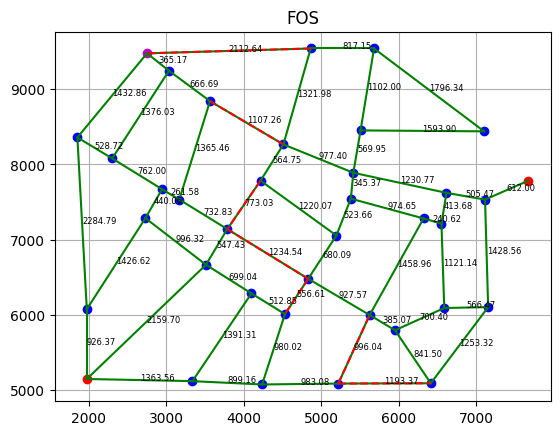

Sector asociado a la fuente 1: Nodos -> [2, 3, 4, 5, 6, 7, 18, 19, 20, 21, 22, 23, 24, 28, 29, 1]
Sector asociado a la fuente 13: Nodos -> [8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 25, 26, 27, 30, 31, 32]

Tuberías a cerrar:
Tubería entre 7 y 8 con capacidad 18.0
Tubería entre 18 y 17 con capacidad 16.0
Tubería entre 24 y 25 con capacidad 16.0
Tubería entre 29 y 30 con capacidad 18.0
Nodos más lejanos de cada sector:
Sector: 1, Fuente: 1, Nodo más lejano: 29, Distancia: 6040.54
Posicion: (-552.41, 2588.2)
Sector: 13, Fuente: 13, Nodo más lejano: 30, Distancia: 6605.19
Posicion: (-552.38, 4369.06)


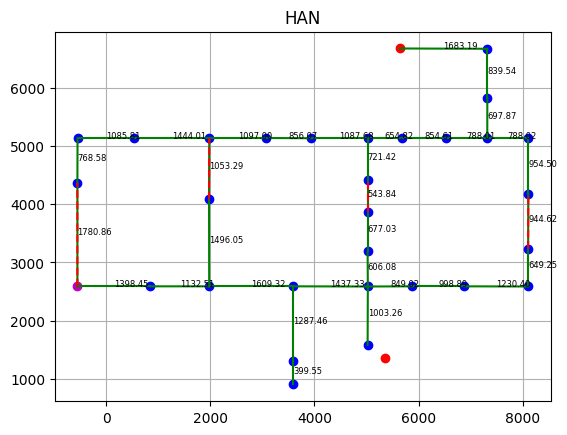

Sector asociado a la fuente 19: Nodos -> [2, 3, 4, 5, 6, 11, 12, 13, 14, 15, 18, 19, 20, 1]
Sector asociado a la fuente 17: Nodos -> [7, 8, 9, 10, 16, 17]

Tuberías a cerrar:
Tubería entre 6 y 7 con capacidad 181.0
Tubería entre 11 y 9 con capacidad 205.0
Tubería entre 20 y 16 con capacidad 63.0
Nodos más lejanos de cada sector:
Sector: 19, Fuente: 19, Nodo más lejano: 1, Distancia: 1383.24
Posicion: (610.0, 2716.0)
Sector: 17, Fuente: 17, Nodo más lejano: 7, Distancia: 900.64
Posicion: (455.0, 1395.0)


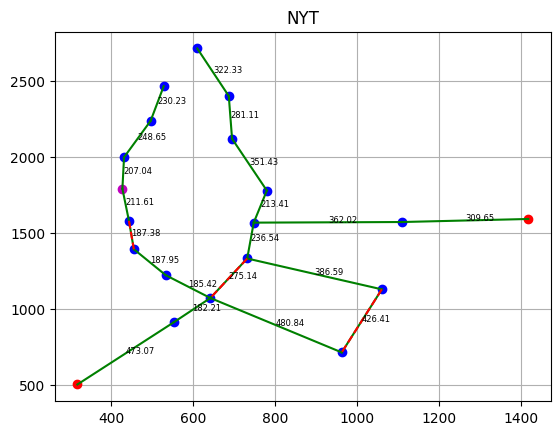

Sector asociado a la fuente 1: Nodos -> [1, 2, 3, 4, 5, 42, 44, 47, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 84, 86, 87, 88, 89, 43]
Sector asociado a la fuente 7: Nodos -> [6, 7, 8, 9, 10, 11, 12, 13, 14, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 45, 46, 48, 49, 50, 51, 52, 76, 82, 83, 85, 65, 15]

Tuberías a cerrar:
Tubería entre 42 y 11 con capacidad 253.0
Tubería entre 47 y 48 con capacidad 253.0
Tubería entre 51 y 53 con capacidad 153.0
Tubería entre 52 y 53 con capacidad 101.0
Tubería entre 86 y 45 con capacidad 103.0
Tubería entre 88 y 51 con capacidad 101.0
Nodos más lejanos de cada sector:
Sector: 1, Fuente: 1, Nodo más lejano: 53, Distancia: 3161.70
Posicion: (659739.94, 963467.5)
Sector: 7, Fuente: 7, Nodo más lejano: 85, Distancia: 3434.60
Posicion: (662548.06, 963787.94)


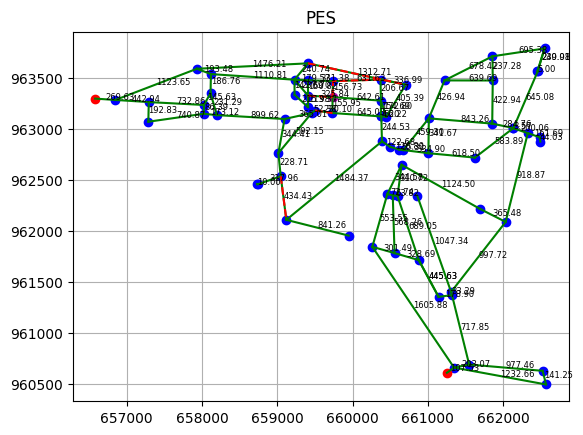

In [11]:
user = "colab"

if user=="misa":
    Files_Routes = ["/Users/misa_v/Library/CloudStorage/OneDrive-InstitutoTecnologicoydeEstudiosSuperioresdeMonterrey/Sem 5/Algoritmos_/SituacionProblema2/FOS.txt",
                "/Users/misa_v/Library/CloudStorage/OneDrive-InstitutoTecnologicoydeEstudiosSuperioresdeMonterrey/Sem 5/Algoritmos_/SituacionProblema2/HAN.txt",
                "/Users/misa_v/Library/CloudStorage/OneDrive-InstitutoTecnologicoydeEstudiosSuperioresdeMonterrey/Sem 5/Algoritmos_/SituacionProblema2/NYT.txt",
                "/Users/misa_v/Library/CloudStorage/OneDrive-InstitutoTecnologicoydeEstudiosSuperioresdeMonterrey/Sem 5/Algoritmos_/SituacionProblema2/PES.txt"]
elif user=="rocco":
    Files_Routes = ["D:\\Tec\\Semestre V\\TC2038 Algoritmos Avanzados\\Code\\SP2\\FOS.txt",
                    "D:\\Tec\\Semestre V\\TC2038 Algoritmos Avanzados\\Code\\SP2\\HAN.txt",
                    "D:\\Tec\\Semestre V\\TC2038 Algoritmos Avanzados\\Code\\SP2\\NYT.txt",
                    "D:\\Tec\\Semestre V\\TC2038 Algoritmos Avanzados\\Code\\SP2\\PES.txt"]
elif user=="colab":
    Files_Routes = ["FOS.txt",
                    "HAN.txt",
                    "NYT.txt",
                    "PES.txt"]

Files_Titles = ["FOS", "HAN", "NYT", "PES"]

for route in Files_Routes:
    nodos_limpio , tuberias_limpio, new_nodes , id_office = file_prep(route)

    # Create a dictionary to map node IDs to Node instances
    node_dict = {node.node_id: node for node in nodos_limpio}

    plt.figure()
    plt.title(Files_Titles[Files_Routes.index(route)])
    for node in nodos_limpio:

        if node.is_source == 1:
            plt.plot(node.x, node.y, 'ro')
        elif node.node_id == id_office:
            plt.plot(node.x, node.y, 'mo')
        else:
            plt.plot(node.x, node.y, 'bo')

    #2 Unir nodos con tuberías y mostrar distancia
    for tuberia in tuberias_limpio:

        tuberia.length = np.sqrt((node_dict[tuberia.start_node].x - node_dict[tuberia.end_node].x)**2 + (node_dict[tuberia.start_node].y - node_dict[tuberia.end_node].y)**2)

        plt.plot([node_dict[tuberia.start_node].x, node_dict[tuberia.end_node].x],[node_dict[tuberia.start_node].y, node_dict[tuberia.end_node].y], 'g')

        plt.text((node_dict[tuberia.start_node].x + node_dict[tuberia.end_node].x) / 2,(node_dict[tuberia.start_node].y + node_dict[tuberia.end_node].y) / 2,f'{tuberia.length:.2f}', color='black', fontsize=6)

    #3: Sectorización
    sectores, tuberias_cerradas = sectorize(nodos_limpio, tuberias_limpio)

    for sector, nodes in sectores.items():
        print(f"Sector asociado a la fuente {sector}: Nodos -> {nodes}")

    print("\nTuberías a cerrar:")
    for tuberia in tuberias_cerradas:
        print(f"Tubería entre {tuberia.start_node} y {tuberia.end_node} con capacidad {tuberia.capacity}")

    for tuberia in tuberias_cerradas:
        plt.plot([node_dict[tuberia.start_node].x, node_dict[tuberia.end_node].x],
                [node_dict[tuberia.start_node].y, node_dict[tuberia.end_node].y], 'r--')

    #4. Frescura del Agua
    results_frescura = frescura_agua(nodos_limpio, sectores)
    print("Nodos más lejanos de cada sector:")
    for resultado in results_frescura:
        print(f"Sector: {resultado['sector']}, Fuente: {resultado['fuente']}, "
          f"Nodo más lejano: {resultado['nodo_mas_lejano']}, "
          f"Distancia: {resultado['distancia']:.2f}")

        print(f"Posicion: {node_dict[resultado['nodo_mas_lejano']].x, node_dict[resultado['nodo_mas_lejano']].y}")

    plt.grid()
    plt.show()
